/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


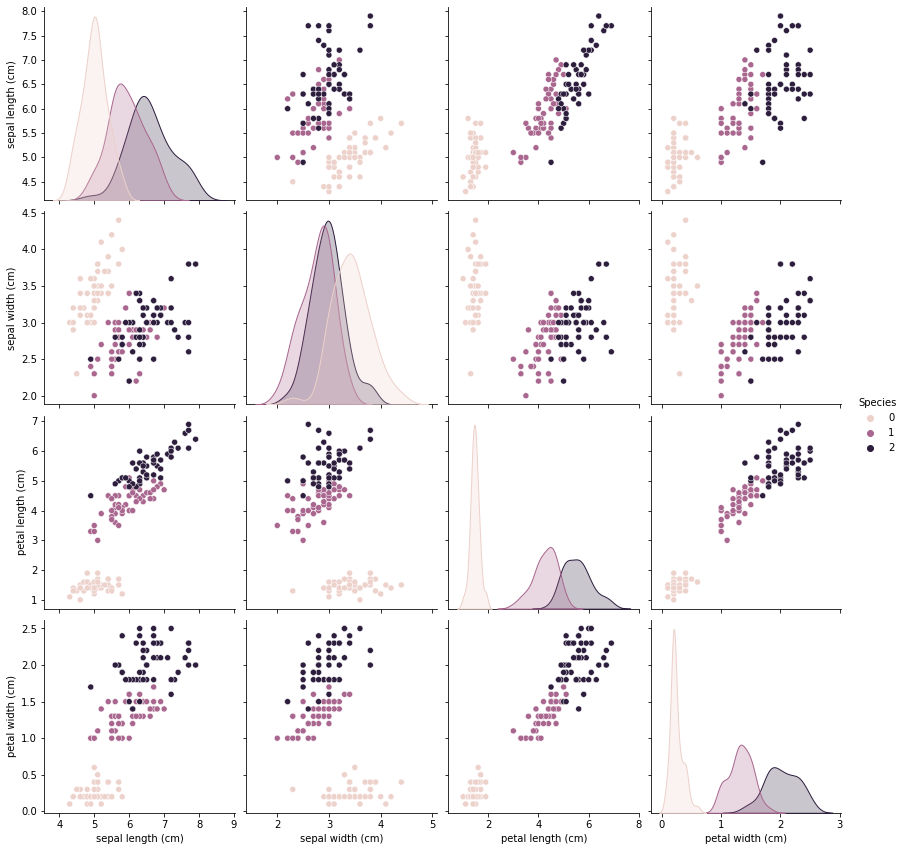

<ipython-input-3-551ba5f78ba1>:46: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.data = x
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


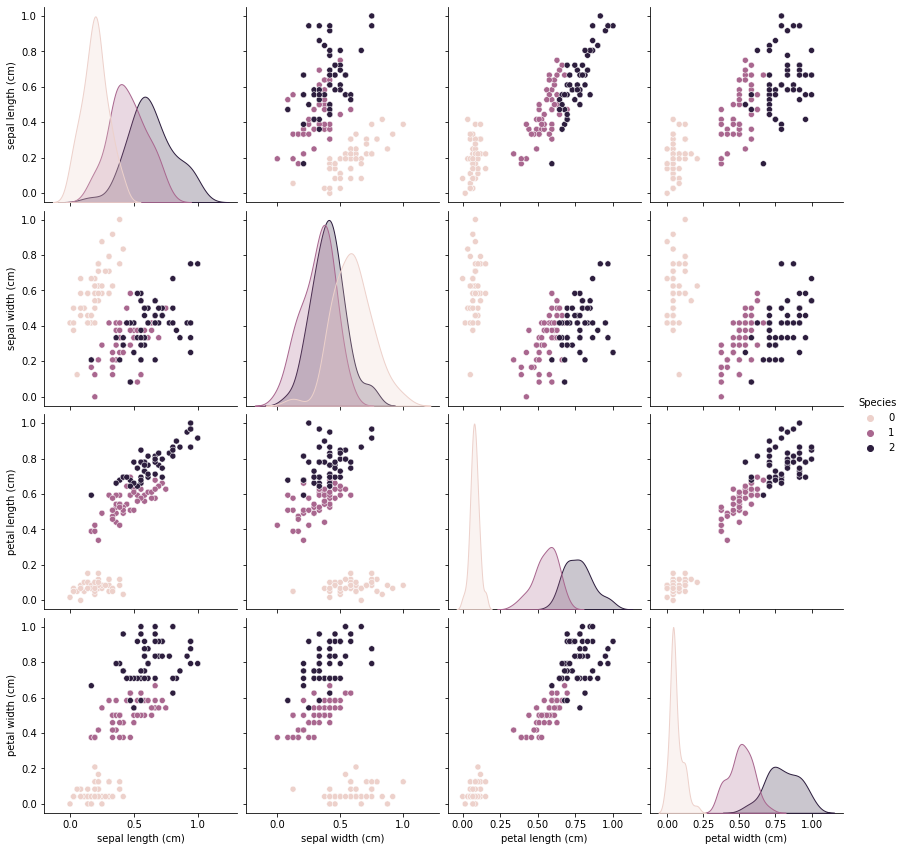

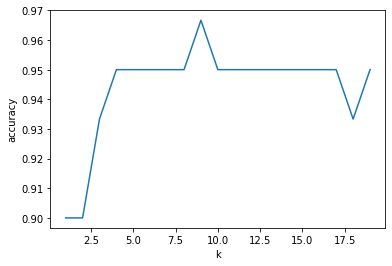

0.9666666666666667


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import datasets


k = 20
size = 0.4


class Neighbours:
    def __init__(self, k):
        self.k = k

    def fit(self, x, y):
        self.X_train = x
        self.y_train = y

    def estimate(self, x, y):
        y_pred = self.p(x)
        return np.sum(y_pred == y) / len(y)

    def p(self, x):
        n = []
        for x in x:
            d = np.sqrt(np.sum((x - self.X_train) ** 2, axis=1))
            y = [y for _, y in sorted(zip(d, self.y_train))]
            n.append(y[:self.k])
        return list(map(lambda x: Counter(x).most_common(1)[0][0], n))


def start():
    i = datasets.load_iris()
    t = i.target
    df = pd.DataFrame(i.data, columns=i.feature_names)
    df['Species'] = t
    x = i.get('data')
    sns.pairplot(df, hue="Species", size=3)
    plt.show()

    normalization(x)
    df.data = x
    sns.pairplot(df, hue="Species", size=3)
    plt.show()

    y = i.get('target')
    x_cur, x, y_cur, y = train_test_split(x, y, test_size=size)

    a = []
    for current in range(1, k):
        neighbours = Neighbours(k=current)
        neighbours.fit(x_cur, y_cur)
        accuracy = neighbours.estimate(x, y)
        a.append(accuracy)
    fig, ax = plt.subplots()
    ax.plot(range(1, k), a)
    ax.set(xlabel="k", ylabel="accuracy")
    plt.show()

    result = np.array(a).max()
    print(result)


def normalization(data):
    for i in range(len(data[0])):
        values = [row[i] for row in data]
        min = np.min(values)
        max = np.max(values)
        for row in data:
            row[i] = (row[i] - min) / (max - min)


if __name__ == "__main__":
    start()